In [67]:
# Import dependencies
from sportsreference.nfl.teams import Teams
from sportsreference.nfl.boxscore import Boxscores
import pandas as pd
from matplotlib import cm

In [2]:
# call boxscores (game stats) from sports-reference and create df
start_year = 2012
end_year = 2022
weeks = list(range(1, 53))
years = list(range(start_year, end_year + 1))

records = []
for y in years:
    for w in weeks:
        try:
            bs = Boxscores(week=w, year=y)
            data = bs.games[f"{w}-{y}"]
            for d in data:
                d['year'] = y
                d['week'] = w 
                records.append(d)
        except:
            pass

bs_df = pd.DataFrame(records)

In [3]:
bs_df.head()

,boxscore,away_name,away_abbr,away_score,home_name,home_abbr,home_score,winning_name,winning_abbr,losing_name,losing_abbr,year,week
0,201209050nyg,Dallas Cowboys,dal,24.0,New York Giants,nyg,17.0,Dallas Cowboys,dal,New York Giants,nyg,2012,1
1,201209090chi,Indianapolis Colts,clt,21.0,Chicago Bears,chi,41.0,Chicago Bears,chi,Indianapolis Colts,clt,2012,1
2,201209090cle,Philadelphia Eagles,phi,17.0,Cleveland Browns,cle,16.0,Philadelphia Eagles,phi,Cleveland Browns,cle,2012,1
3,201209090det,St. Louis Rams,ram,23.0,Detroit Lions,det,27.0,Detroit Lions,det,St. Louis Rams,ram,2012,1
4,201209090htx,Miami Dolphins,mia,10.0,Houston Texans,htx,30.0,Houston Texans,htx,Miami Dolphins,mia,2012,1


In [4]:
# call team stats from sports-reference and create df
teams = Teams()
team_dataframes = []

for t in teams:
    team_dataframes.append(t.dataframe)
    
teams_df = pd.concat(team_dataframes)

In [5]:
#can review individual team in team stats df
teams_df.loc['RAV']

abbreviation                                   RAV
defensive_simple_rating_system                -1.9
first_downs                                     77
first_downs_from_penalties                       7
fumbles                                          1
games_played                                     4
interceptions                                    4
losses                                           2
margin_of_victory                              4.8
name                              Baltimore Ravens
offensive_simple_rating_system                12.3
pass_attempts                                  117
pass_completions                                76
pass_first_downs                                39
pass_net_yards_per_attempt                     7.0
pass_touchdowns                                 11
pass_yards                                     869
penalties                                       17
percent_drives_with_points                    42.2
percent_drives_with_turnovers  

In [6]:
teams_df.head()

,abbreviation,defensive_simple_rating_system,first_downs,first_downs_from_penalties,fumbles,games_played,interceptions,losses,margin_of_victory,name,...,rush_yards,rush_yards_per_attempt,simple_rating_system,strength_of_schedule,turnovers,win_percentage,wins,yards,yards_from_penalties,yards_per_play
DET,DET,-13.3,90,7,1,4,3,3,-0.3,Detroit Lions,...,656,5.9,3.0,3.2,4,0.25,1,1747,188,6.5
KAN,KAN,-9.0,95,10,2,4,2,1,8.3,Kansas City Chiefs,...,468,4.5,5.1,-3.1,4,0.75,3,1539,156,6.0
RAV,RAV,-1.9,77,7,1,4,4,2,4.8,Baltimore Ravens,...,568,5.4,10.5,5.7,5,0.50,2,1437,114,6.2
PHI,PHI,9.1,98,9,0,4,2,0,11.0,Philadelphia Eagles,...,661,4.3,15.8,4.8,2,1.00,4,1742,193,6.1
BUF,BUF,12.0,99,7,4,4,3,1,14.0,Buffalo Bills,...,462,4.8,16.7,2.7,7,0.75,3,1650,167,6.0


In [7]:
# Add team stats data to each line item of historic game data
records = []
for i, r in bs_df.iterrows():
    d = r.to_dict()
    
# team 1 is always home, team 2 is always away
    team_1_abv = r['home_abbr']
    team_2_abv = r['away_abbr']

    team_1_stats = teams_df.loc[team_1_abv.upper()]
    team_2_stats = teams_df.loc[team_2_abv.upper()]

    for k,v in team_1_stats.to_dict().items():
        d[f'team_1_{k}'] = v

    for k,v in team_2_stats.to_dict().items():
        d[f'team_2_{k}'] = v

    records.append(d)
    
combined_df = pd.DataFrame(records)

In [8]:
combined_df.head()

,boxscore,away_name,away_abbr,away_score,home_name,home_abbr,home_score,winning_name,winning_abbr,losing_name,...,team_2_rush_yards,team_2_rush_yards_per_attempt,team_2_simple_rating_system,team_2_strength_of_schedule,team_2_turnovers,team_2_win_percentage,team_2_wins,team_2_yards,team_2_yards_from_penalties,team_2_yards_per_play
0,201209050nyg,Dallas Cowboys,dal,24.0,New York Giants,nyg,17.0,Dallas Cowboys,dal,New York Giants,...,416,4.0,4.2,2.0,2,0.750,3,1251,208,5.2
1,201209090chi,Indianapolis Colts,clt,21.0,Chicago Bears,chi,41.0,Chicago Bears,chi,Indianapolis Colts,...,351,3.5,-7.5,-0.5,9,0.375,1,1359,203,5.0
2,201209090cle,Philadelphia Eagles,phi,17.0,Cleveland Browns,cle,16.0,Philadelphia Eagles,phi,Cleveland Browns,...,661,4.3,15.8,4.8,2,1.000,4,1742,193,6.1
3,201209090det,St. Louis Rams,ram,23.0,Detroit Lions,det,27.0,Detroit Lions,det,St. Louis Rams,...,274,3.3,-4.6,1.4,9,0.500,2,1176,131,4.7
4,201209090htx,Miami Dolphins,mia,10.0,Houston Texans,htx,30.0,Houston Texans,htx,Miami Dolphins,...,277,3.5,10.1,8.4,4,0.750,3,1444,132,6.4


In [9]:
combined_df.to_csv("match_team_data.csv", index=False)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [11]:
# Create a column to account for Wins, Losses, and Ties
# Win = 1 , Loss = 0, Tie = -1

combined_df["home_win"] = np.where(combined_df["home_score"] > combined_df["away_score"], 1, np.where(combined_df["home_score"] == combined_df["away_score"],0,-1))

In [12]:
combined_df.head()

,boxscore,away_name,away_abbr,away_score,home_name,home_abbr,home_score,winning_name,winning_abbr,losing_name,...,team_2_rush_yards_per_attempt,team_2_simple_rating_system,team_2_strength_of_schedule,team_2_turnovers,team_2_win_percentage,team_2_wins,team_2_yards,team_2_yards_from_penalties,team_2_yards_per_play,home_win
0,201209050nyg,Dallas Cowboys,dal,24.0,New York Giants,nyg,17.0,Dallas Cowboys,dal,New York Giants,...,4.0,4.2,2.0,2,0.750,3,1251,208,5.2,-1
1,201209090chi,Indianapolis Colts,clt,21.0,Chicago Bears,chi,41.0,Chicago Bears,chi,Indianapolis Colts,...,3.5,-7.5,-0.5,9,0.375,1,1359,203,5.0,1
2,201209090cle,Philadelphia Eagles,phi,17.0,Cleveland Browns,cle,16.0,Philadelphia Eagles,phi,Cleveland Browns,...,4.3,15.8,4.8,2,1.000,4,1742,193,6.1,-1
3,201209090det,St. Louis Rams,ram,23.0,Detroit Lions,det,27.0,Detroit Lions,det,St. Louis Rams,...,3.3,-4.6,1.4,9,0.500,2,1176,131,4.7,1
4,201209090htx,Miami Dolphins,mia,10.0,Houston Texans,htx,30.0,Houston Texans,htx,Miami Dolphins,...,3.5,10.1,8.4,4,0.750,3,1444,132,6.4,1


In [52]:
# Create new X and Y variables without dropped features
X = combined_df[
    [ 
        'team_1_defensive_simple_rating_system',
        'team_1_first_downs',
        'team_1_first_downs_from_penalties',
        'team_1_fumbles',
        'team_1_games_played',
        'team_1_interceptions',
        'team_1_losses',
        'team_1_margin_of_victory',
        'team_1_offensive_simple_rating_system',
        'team_1_pass_attempts',
        'team_1_pass_completions',
        'team_1_pass_first_downs',
        'team_1_pass_net_yards_per_attempt',
        'team_1_pass_touchdowns',
        'team_1_pass_yards',
        'team_1_penalties',
        'team_1_percent_drives_with_points',
        'team_1_percent_drives_with_turnovers',
        'team_1_plays',
        'team_1_points_against',
        'team_1_points_contributed_by_offense',
        'team_1_points_difference',
        'team_1_points_for',
        'team_1_rank',
        'team_1_rush_attempts',
        'team_1_rush_first_downs',
        'team_1_rush_touchdowns',
        'team_1_rush_yards',
        'team_1_rush_yards_per_attempt',
        'team_1_simple_rating_system',
        'team_1_strength_of_schedule',
        'team_1_turnovers',
        'team_1_win_percentage',
        'team_1_wins',
        'team_1_yards',
        'team_1_yards_from_penalties',
        'team_1_yards_per_play',
        'team_2_defensive_simple_rating_system',
        'team_2_first_downs',
        'team_2_first_downs_from_penalties',
        'team_2_fumbles',
        'team_2_games_played',
        'team_2_interceptions',
        'team_2_losses',
        'team_2_margin_of_victory',
        'team_2_offensive_simple_rating_system',
        'team_2_pass_attempts',
        'team_2_pass_completions',
        'team_2_pass_first_downs',
        'team_2_pass_net_yards_per_attempt',
        'team_2_pass_touchdowns',
        'team_2_pass_yards',
        'team_2_penalties',
        'team_2_percent_drives_with_points',
        'team_2_percent_drives_with_turnovers',
        'team_2_plays',
        'team_2_points_against',
        'team_2_points_contributed_by_offense',
        'team_2_points_difference',
        'team_2_points_for',
        'team_2_rank',
        'team_2_rush_attempts',
        'team_2_rush_first_downs',
        'team_2_rush_touchdowns',
        'team_2_rush_yards',
        'team_2_rush_yards_per_attempt',
        'team_2_simple_rating_system',
        'team_2_strength_of_schedule',
        'team_2_turnovers',
        'team_2_win_percentage',
        'team_2_wins',
        'team_2_yards',
        'team_2_yards_from_penalties',
        'team_2_yards_per_play',
    ]
]
y = combined_df['home_win']

In [53]:
# Apply Train_Test_Split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [54]:
# Set the scaler
scaler = StandardScaler()

In [55]:
# Fit and Transform the data
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
# Create the model
model = RandomForestClassifier()

In [57]:
# Fit the data
model.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
# Make the predictions
y_pred = model.predict(X_test)

In [59]:
# print the results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[196   1 153]
 [  1   0   0]
 [183   0 207]]
              precision    recall  f1-score   support

          -1       0.52      0.56      0.54       350
           0       0.00      0.00      0.00         1
           1       0.57      0.53      0.55       390

    accuracy                           0.54       741
   macro avg       0.36      0.36      0.36       741
weighted avg       0.55      0.54      0.54       741

0.543859649122807


In [60]:
# Create list of model feature names
importances_names = model.feature_names_in_

In [61]:
# View importances of features in Random Forest Model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # index value of a feature
names = [X_train.columns[i] for i in indices]  # extract the title of that feature

In [64]:
# Create df that displays importances
importances_df = pd.DataFrame({"feature_importances": importances, "feature_name": importances_names})

In [65]:
# Sort importances by values
importances_df = importances_df.sort_values(by="feature_importances", ascending=True)

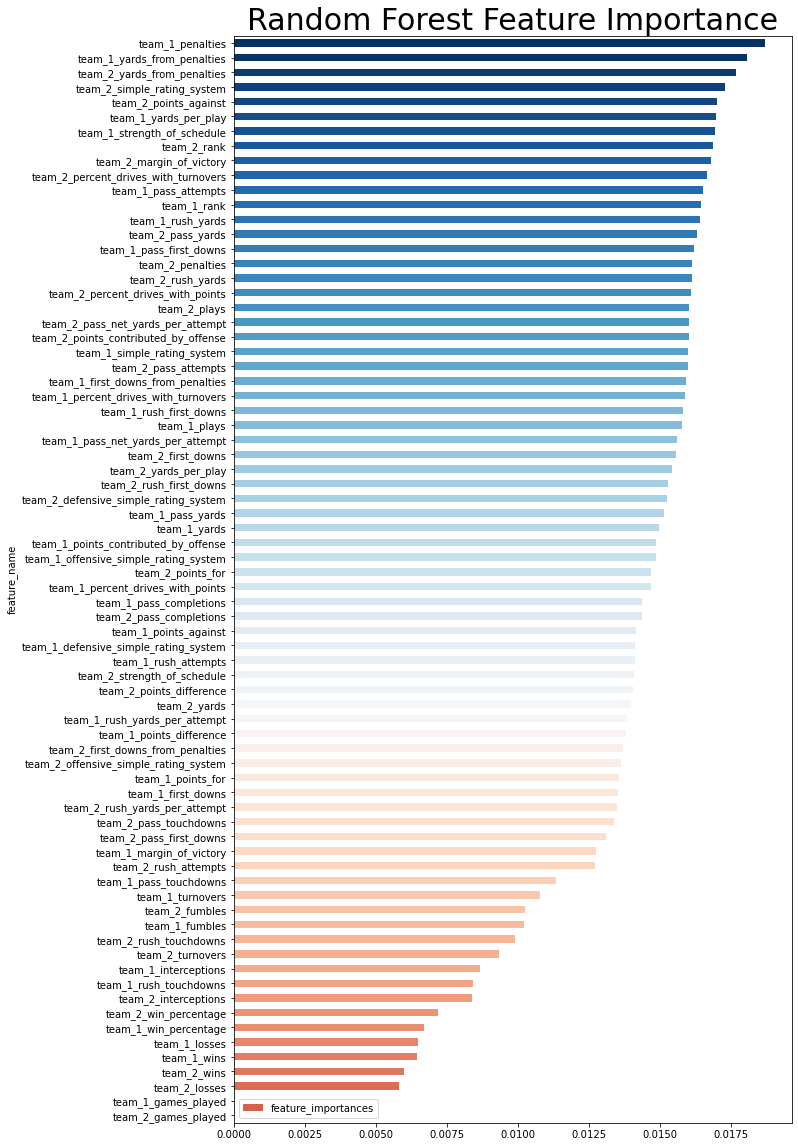

In [69]:
# Plot feature importance as vertical bar chart with a diverging color palette
colors = cm.RdBu(np.linspace(.2, 1, importances_df.shape[0]))

importances_df.plot.barh(
    x="feature_name", 
    y='feature_importances', 
    figsize=(10,20), 
    title="Random Forest Feature Importance",
    color=colors).title.set_size(30)